> Notebook_for_clustering_final

April 30, 2023

In \[1\]: *\# Loading the libraries*

> **import sys**  
> **from pyspark.sql import** SparkSession  
> **import pyspark.sql.functions as F**  
> **import matplotlib.pyplot as plt**  
> **from pyspark.sql.functions import** corr  
> **import matplotlib.pyplot as plt**  
> **import seaborn as sns**  
> **from pyspark.ml.feature import** VectorAssembler  
> **import pandas as pd**  
> **from pyspark.ml.stat import** Correlation  
> **from pyspark.ml.feature import** MinMaxScaler  
> **from pyspark.sql.functions import** col
>
> spark = SparkSession.builder \\  
> .master("local") \\  
> .appName("Project") \\  
> .getOrCreate()

**1** **Loading the dataset before preprocessing**

In \[2\]: df = spark.read.csv("query.csv", header=**True**,
inferSchema=**True**) column_names = df.columns  
print(column_names)

\['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
'gap', 'dmin', 'rms', 'net

In \[3\]: *\# Convert the PySpark DataFrame to a Pandas DataFrame*  
pd_df = df.select(\['time', 'latitude', 'longitude', 'depth', 'mag',
'magType', 'place'

In \[4\]: pd_df.info()

\<class 'pandas.core.frame.DataFrame'\>  
RangeIndex: 30336 entries, 0 to 30335  
Data columns (total 8 columns):

1

time 30336 non-null datetime64\[ns\] latitude 30336 non-null float64  
longitude 30336 non-null float64  
depth 30336 non-null float64  
mag 30336 non-null float64  
magType 30331 non-null object  
place 30298 non-null object  
locationSource 30336 non-null object  
dtypes: datetime64\[ns\](1), float64(4), object(3) memory usage: 1.9+ MB

In \[5\]: *\# Extracting useful Variables*  
pd_df = pd_df.dropna(subset=\['time', 'latitude', 'longitude', 'depth',
'mag', 'magType

In \[6\]: *\# Creating new variable region*  
pd_df\['region'\] =
pd_df\['place'\].str.split(',').str\[-1\].str.strip()

In \[7\]: *\# Creating new variable year*  
pd_df\['year'\] = pd_df\['time'\].dt.year

In \[8\]: *\# Creating new variable decade_year*  
pd_df\['decade_year'\] = (pd_df\['year'\] // 10) \* 10

In \[9\]: pd_df.head(10)

<table>
<colgroup>
<col style="width: 9%" />
<col style="width: 9%" />
<col style="width: 9%" />
<col style="width: 9%" />
<col style="width: 9%" />
<col style="width: 9%" />
<col style="width: 9%" />
<col style="width: 9%" />
<col style="width: 9%" />
<col style="width: 9%" />
<col style="width: 9%" />
</colgroup>
<thead>
<tr class="header">
<th rowspan="22">Out[9]:</th>
<th colspan="2">time</th>
<th>latitude</th>
<th>longitude</th>
<th>depth</th>
<th colspan="2">mag magType</th>
<th>\</th>
<th rowspan="12">year</th>
<th rowspan="22"><blockquote>
<p>\</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>0</p>
</blockquote></th>
<th>2023-02-28 15:49:17.330</th>
<th><blockquote>
<p>37.9073</p>
</blockquote></th>
<th>36.7306</th>
<th><blockquote>
<p>10.000</p>
</blockquote></th>
<th><blockquote>
<p>3.9</p>
</blockquote></th>
<th colspan="2">mwr</th>
</tr>
<tr class="header">
<th><blockquote>
<p>2</p>
</blockquote></th>
<th>2023-02-19 15:26:21.752</th>
<th><blockquote>
<p>34.6990</p>
</blockquote></th>
<th>32.9989</th>
<th>6.139</th>
<th><blockquote>
<p>3.6</p>
</blockquote></th>
<th colspan="2">ml</th>
</tr>
<tr class="odd">
<th><blockquote>
<p>3</p>
</blockquote></th>
<th>2022-08-19 23:16:06.606</th>
<th><blockquote>
<p>35.0510</p>
</blockquote></th>
<th>25.2338</th>
<th><blockquote>
<p>12.618</p>
</blockquote></th>
<th><blockquote>
<p>3.7</p>
</blockquote></th>
<th colspan="2">mb</th>
</tr>
<tr class="header">
<th><blockquote>
<p>4</p>
</blockquote></th>
<th>2022-08-01 02:04:44.377</th>
<th><blockquote>
<p>45.4685</p>
</blockquote></th>
<th>16.2190</th>
<th>9.826</th>
<th><blockquote>
<p>3.7</p>
</blockquote></th>
<th colspan="2">mb</th>
</tr>
<tr class="odd">
<th><blockquote>
<p>5</p>
</blockquote></th>
<th>2022-05-12 23:12:04.312</th>
<th><blockquote>
<p>43.6720</p>
</blockquote></th>
<th>11.2558</th>
<th>7.930</th>
<th><blockquote>
<p>3.5</p>
</blockquote></th>
<th colspan="2">ml</th>
</tr>
<tr class="header">
<th><blockquote>
<p>6</p>
</blockquote></th>
<th>2022-05-03 17:50:49.842</th>
<th><blockquote>
<p>43.6656</p>
</blockquote></th>
<th>11.2840</th>
<th>7.420</th>
<th><blockquote>
<p>3.5</p>
</blockquote></th>
<th colspan="2">ml</th>
</tr>
<tr class="odd">
<th><blockquote>
<p>7</p>
</blockquote></th>
<th>2022-01-23 11:28:07.151</th>
<th><blockquote>
<p>32.6567</p>
</blockquote></th>
<th>35.4637</th>
<th><blockquote>
<p>10.000</p>
</blockquote></th>
<th><blockquote>
<p>3.7</p>
</blockquote></th>
<th colspan="2">ml</th>
</tr>
<tr class="header">
<th><blockquote>
<p>8</p>
</blockquote></th>
<th>2021-11-03 00:25:46.418</th>
<th><blockquote>
<p>43.9764</p>
</blockquote></th>
<th>20.8848</th>
<th><blockquote>
<p>10.000</p>
</blockquote></th>
<th><blockquote>
<p>3.9</p>
</blockquote></th>
<th colspan="2">mb</th>
</tr>
<tr class="odd">
<th><blockquote>
<p>9</p>
</blockquote></th>
<th>2021-07-22 01:03:46.760</th>
<th><blockquote>
<p>38.9222</p>
</blockquote></th>
<th>26.0911</th>
<th><blockquote>
<p>14.730</p>
</blockquote></th>
<th><blockquote>
<p>3.9</p>
</blockquote></th>
<th colspan="2">mb</th>
</tr>
<tr class="header">
<th colspan="2">10 2021-06-19 14:07:52.133</th>
<th><blockquote>
<p>40.9881</p>
</blockquote></th>
<th>29.1424</th>
<th>9.810</th>
<th><blockquote>
<p>3.5</p>
</blockquote></th>
<th colspan="2">ml</th>
</tr>
<tr class="odd">
<th colspan="5">place locationSource</th>
<th colspan="3">region</th>
</tr>
<tr class="header">
<th><blockquote>
<p>0</p>
</blockquote></th>
<th colspan="3">Central Turkey</th>
<th>us</th>
<th colspan="3"><blockquote>
<p>Central Turkey</p>
</blockquote></th>
<th>2023</th>
</tr>
<tr class="odd">
<th><blockquote>
<p>2</p>
</blockquote></th>
<th colspan="3"><blockquote>
<p>0 km SE of Páno Polemídia, Cyprus</p>
</blockquote></th>
<th>us</th>
<th colspan="3">Cyprus</th>
<th>2023</th>
</tr>
<tr class="header">
<th><blockquote>
<p>3</p>
</blockquote></th>
<th colspan="3"><blockquote>
<p>8 km ENE of Pýrgos, Greece</p>
</blockquote></th>
<th>us</th>
<th colspan="3">Greece</th>
<th>2022</th>
</tr>
<tr class="odd">
<th><blockquote>
<p>4</p>
</blockquote></th>
<th colspan="3"><blockquote>
<p>6 km WNW of Petrinja, Croatia</p>
</blockquote></th>
<th>us</th>
<th colspan="3">Croatia</th>
<th>2022</th>
</tr>
<tr class="header">
<th><blockquote>
<p>5</p>
</blockquote></th>
<th colspan="3"><blockquote>
<p>1 km S of Impruneta, Italy</p>
</blockquote></th>
<th>us</th>
<th colspan="3">Italy</th>
<th>2022</th>
</tr>
<tr class="odd">
<th><blockquote>
<p>6</p>
</blockquote></th>
<th colspan="3"><blockquote>
<p>1 km NW of Strada in Chianti, Italy</p>
</blockquote></th>
<th>us</th>
<th colspan="3">Italy</th>
<th>2022</th>
</tr>
<tr class="header">
<th><blockquote>
<p>7</p>
</blockquote></th>
<th colspan="3"><blockquote>
<p>4 km ENE of Kafr Mi?r, Israel</p>
</blockquote></th>
<th>us</th>
<th colspan="3">Israel</th>
<th>2022</th>
</tr>
<tr class="odd">
<th><blockquote>
<p>8</p>
</blockquote></th>
<th colspan="3"><blockquote>
<p>5 km SSW of Kragujevac, Serbia</p>
</blockquote></th>
<th>us</th>
<th colspan="3">Serbia</th>
<th>2021</th>
</tr>
<tr class="header">
<th><blockquote>
<p>9</p>
</blockquote></th>
<th colspan="3"><blockquote>
<p>19 km SSW of Polichnítos, Greece</p>
</blockquote></th>
<th>us</th>
<th colspan="3">Greece</th>
<th>2021</th>
</tr>
<tr class="odd">
<th>10</th>
<th colspan="3">2 km ENE of Ata?ehir, Turkey</th>
<th>us</th>
<th colspan="3">Turkey</th>
<th>2021</th>
</tr>
</thead>
<tbody>
</tbody>
</table>

2

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>0<br />
2<br />
3<br />
4<br />
5<br />
6<br />
7<br />
8<br />
9<br />
10</p>
</blockquote></th>
<th><blockquote>
<p>decade_year<br />
2020<br />
2020<br />
2020<br />
2020<br />
2020<br />
2020<br />
2020<br />
2020<br />
2020<br />
2020</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

In \[10\]: *\# Descriptive Statistics*  
pd_df\[\['latitude', 'longitude', 'depth', 'mag'\]\].describe()

<table style="width:100%;">
<colgroup>
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
</colgroup>
<thead>
<tr class="header">
<th rowspan="9">Out[10]:</th>
<th rowspan="2">count</th>
<th>latitude</th>
<th>longitude</th>
<th>depth</th>
<th>mag</th>
</tr>
<tr class="odd">
<th>30293.00000</th>
<th>30293.000000</th>
<th>30293.000000</th>
<th><blockquote>
<p>30293.000000</p>
</blockquote></th>
</tr>
<tr class="header">
<th><blockquote>
<p>mean</p>
</blockquote></th>
<th>38.32942</th>
<th>21.310123</th>
<th>23.410525</th>
<th>4.018592</th>
</tr>
<tr class="odd">
<th><blockquote>
<p>std</p>
</blockquote></th>
<th>2.90449</th>
<th>8.200119</th>
<th>36.356840</th>
<th>0.458081</th>
</tr>
<tr class="header">
<th><blockquote>
<p>min</p>
</blockquote></th>
<th>30.07900</th>
<th>-5.727000</th>
<th>0.000000</th>
<th>3.500000</th>
</tr>
<tr class="odd">
<th><blockquote>
<p>25%</p>
</blockquote></th>
<th>36.11000</th>
<th>20.050000</th>
<th>10.000000</th>
<th>3.600000</th>
</tr>
<tr class="header">
<th><blockquote>
<p>50%</p>
</blockquote></th>
<th>38.04800</th>
<th>22.314000</th>
<th>10.000000</th>
<th>3.900000</th>
</tr>
<tr class="odd">
<th><blockquote>
<p>75%</p>
</blockquote></th>
<th>39.94400</th>
<th>26.485900</th>
<th>28.900000</th>
<th>4.300000</th>
</tr>
<tr class="header">
<th><blockquote>
<p>max</p>
</blockquote></th>
<th>46.01200</th>
<th>36.730600</th>
<th><blockquote>
<p>626.200000</p>
</blockquote></th>
<th>7.600000</th>
</tr>
</thead>
<tbody>
</tbody>
</table>

In \[11\]: *\# Extract the "magnitude" and "depth" columns to plot*
columns = \["mag", "depth"\]

> *\# Plot the histograms side-by-side*  
> pd_df.hist(column=columns, bins=10, figsize=(15, 5))
>
> plt.show()

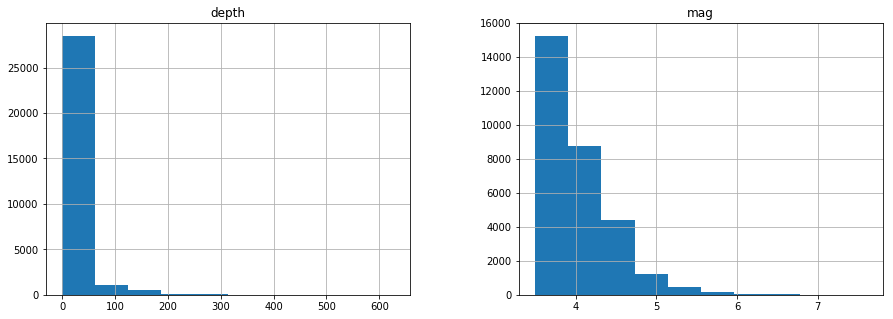

3

In \[12\]: *\# Plot the boxplot*  
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6)) **for** i,
col **in** enumerate(columns):  
pd_df.boxplot(column=col, ax=axes\[i\])  
axes\[i\].set_title(col)  
plt.show()

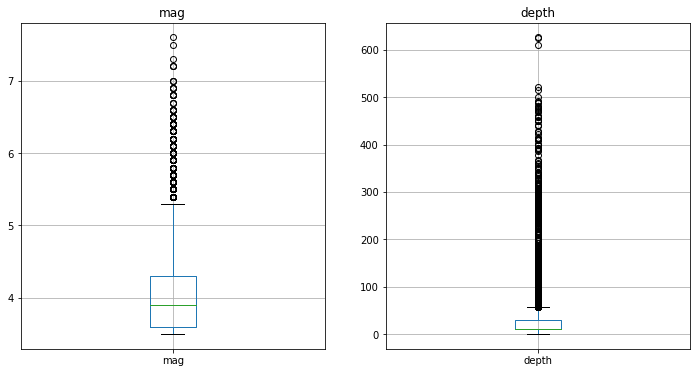

In \[13\]: *\# Extract the "latitude" and "longitude" columns to plot*
columns = \["latitude", "longitude"\]

> *\# Plot the histograms side-by-side*  
> pd_df.hist(column=columns, bins=20, figsize=(15, 5))
>
> plt.show()

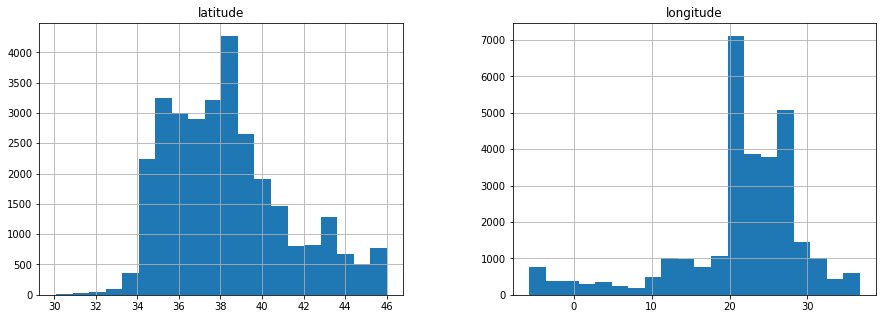

4

In \[15\]: *\# Plot the histograms side-by-side*  
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6)) **for** i,
col **in** enumerate(columns):  
pd_df.boxplot(column=col, ax=axes\[i\])  
axes\[i\].set_title(col)  
plt.show()

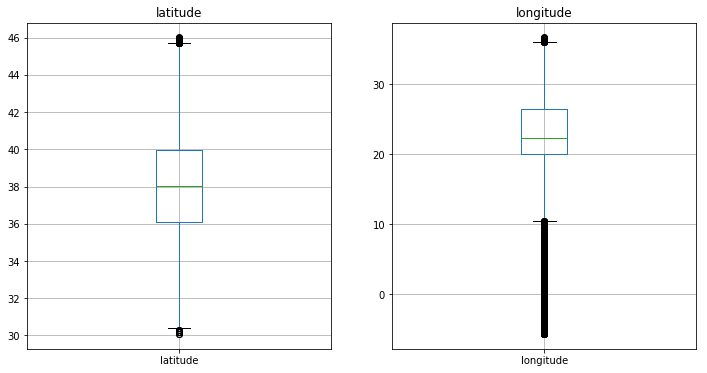

In \[16\]: *\# Descriptive statistics for each decade*  
decade_mag_stats = pd_df.groupby('decade_year')\['mag'\].describe()
print(decade_mag_stats)

<table>
<colgroup>
<col style="width: 11%" />
<col style="width: 11%" />
<col style="width: 11%" />
<col style="width: 11%" />
<col style="width: 11%" />
<col style="width: 11%" />
<col style="width: 11%" />
<col style="width: 11%" />
<col style="width: 11%" />
</colgroup>
<thead>
<tr class="header">
<th>decade_year</th>
<th>count</th>
<th>mean</th>
<th>std</th>
<th>min</th>
<th>25%</th>
<th>50%</th>
<th>75%</th>
<th><blockquote>
<p>max</p>
</blockquote></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td>1970</td>
<td><blockquote>
<p>1737.0</p>
</blockquote></td>
<td>4.226079</td>
<td>0.507529</td>
<td>3.5</td>
<td>3.8</td>
<td>4.2</td>
<td>4.5</td>
<td><blockquote>
<p>7.5</p>
</blockquote></td>
</tr>
<tr class="even">
<td>1980</td>
<td><blockquote>
<p>5447.0</p>
</blockquote></td>
<td>4.052084</td>
<td>0.460869</td>
<td>3.5</td>
<td>3.7</td>
<td>4.0</td>
<td>4.3</td>
<td><blockquote>
<p>7.3</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>1990</td>
<td><blockquote>
<p>7386.0</p>
</blockquote></td>
<td>3.936055</td>
<td>0.417730</td>
<td>3.5</td>
<td>3.6</td>
<td>3.8</td>
<td>4.1</td>
<td><blockquote>
<p>7.6</p>
</blockquote></td>
</tr>
<tr class="even">
<td>2000</td>
<td>10554.0</td>
<td>3.846077</td>
<td>0.391493</td>
<td>3.5</td>
<td>3.6</td>
<td>3.7</td>
<td>4.0</td>
<td><blockquote>
<p>6.9</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>2010</td>
<td><blockquote>
<p>3508.0</p>
</blockquote></td>
<td>4.375285</td>
<td>0.373245</td>
<td>3.5</td>
<td>4.1</td>
<td>4.3</td>
<td>4.5</td>
<td><blockquote>
<p>6.9</p>
</blockquote></td>
</tr>
<tr class="even">
<td>2020</td>
<td><blockquote>
<p>1661.0</p>
</blockquote></td>
<td>4.401626</td>
<td>0.366131</td>
<td>3.5</td>
<td>4.2</td>
<td>4.3</td>
<td>4.5</td>
<td><blockquote>
<p>7.0</p>
</blockquote></td>
</tr>
</tbody>
</table>

In \[17\]: *\# Creating a barplot to depict the number of earthquake in
each region*

> region_counts =
> pd_df.groupby('region').size().reset_index(name='count') fig, ax =
> plt.subplots(figsize=(12, 6))  
> region_counts.plot(x='region', y='count', kind='bar', ax=ax)  
> ax.set_xlabel('Region')  
> ax.set_ylabel('Frequency')

5

> ax.set_xticklabels(region_counts\['region'\], rotation=90, ha='right')
> plt.tight_layout()  
> plt.show()

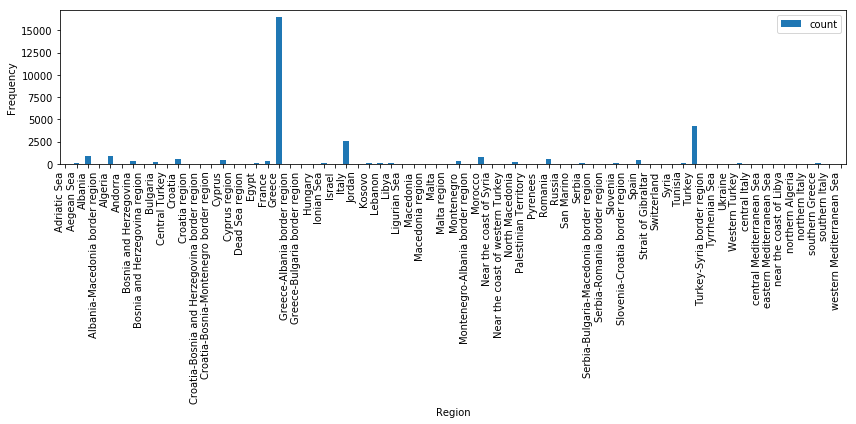

In \[19\]: *\# Descriptive statistics for each region*  
Country_mag_stats = pd_df.groupby('region')\['mag'\].describe()
print(Country_mag_stats)

<table>
<colgroup>
<col style="width: 20%" />
<col style="width: 20%" />
<col style="width: 20%" />
<col style="width: 20%" />
<col style="width: 20%" />
</colgroup>
<thead>
<tr class="header">
<th>region</th>
<th>count</th>
<th>mean</th>
<th>std</th>
<th rowspan="20"><blockquote>
<p>\</p>
</blockquote></th>
</tr>
<tr class="odd">
<th>Adriatic Sea</th>
<th>10.0</th>
<th>3.910000</th>
<th>0.401248</th>
</tr>
<tr class="header">
<th>Aegean Sea</th>
<th>45.0</th>
<th>3.820000</th>
<th>0.344172</th>
</tr>
<tr class="odd">
<th>Albania</th>
<th>924.0</th>
<th>4.029870</th>
<th>0.467046</th>
</tr>
<tr class="header">
<th>Albania-Macedonia border region</th>
<th>7.0</th>
<th>3.885714</th>
<th>0.353217</th>
</tr>
<tr class="odd">
<th>Algeria</th>
<th>839.0</th>
<th>4.135042</th>
<th>0.522215</th>
</tr>
<tr class="header">
<th>Andorra</th>
<th>1.0</th>
<th>3.700000</th>
<th>NaN</th>
</tr>
<tr class="odd">
<th>Bosnia and Herzegovina</th>
<th>316.0</th>
<th>4.018671</th>
<th>0.448913</th>
</tr>
<tr class="header">
<th>Bosnia and Herzegovina region</th>
<th>2.0</th>
<th>3.800000</th>
<th>0.282843</th>
</tr>
<tr class="odd">
<th>Bulgaria</th>
<th>150.0</th>
<th>4.012667</th>
<th>0.432147</th>
</tr>
<tr class="header">
<th>Central Turkey</th>
<th>33.0</th>
<th>4.345455</th>
<th>0.439525</th>
</tr>
<tr class="odd">
<th>Croatia</th>
<th>496.0</th>
<th>3.992540</th>
<th>0.441262</th>
</tr>
<tr class="header">
<th>Croatia region</th>
<th>7.0</th>
<th>3.957143</th>
<th>0.320713</th>
</tr>
<tr class="odd">
<th>Croatia-Bosnia and Herzegovina border region</th>
<th>1.0</th>
<th>3.500000</th>
<th>NaN</th>
</tr>
<tr class="header">
<th>Croatia-Bosnia-Montenegro border region</th>
<th>3.0</th>
<th>4.033333</th>
<th>0.611010</th>
</tr>
<tr class="odd">
<th>Cyprus</th>
<th>481.0</th>
<th>4.046778</th>
<th>0.484977</th>
</tr>
<tr class="header">
<th>Cyprus region</th>
<th>13.0</th>
<th>4.261538</th>
<th>0.550058</th>
</tr>
<tr class="odd">
<th>Dead Sea region</th>
<th>1.0</th>
<th>3.900000</th>
<th>NaN</th>
</tr>
<tr class="header">
<th>Egypt</th>
<th>46.0</th>
<th>4.236957</th>
<th>0.449868</th>
</tr>
<tr class="odd">
<th>France</th>
<th>318.0</th>
<th>3.888994</th>
<th>0.388037</th>
</tr>
</thead>
<tbody>
</tbody>
</table>

6

<table>
<colgroup>
<col style="width: 12%" />
<col style="width: 12%" />
<col style="width: 12%" />
<col style="width: 12%" />
<col style="width: 12%" />
<col style="width: 12%" />
<col style="width: 12%" />
<col style="width: 12%" />
</colgroup>
<thead>
<tr class="header">
<th>Greece</th>
<th colspan="2">16480.0</th>
<th colspan="3">4.004345</th>
<th colspan="2"><blockquote>
<p>0.447618</p>
</blockquote></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td>Greece-Albania border region</td>
<td colspan="2">16.0</td>
<td colspan="3">4.062500</td>
<td colspan="2"><blockquote>
<p>0.538981</p>
</blockquote></td>
</tr>
<tr class="even">
<td>Greece-Bulgaria border region</td>
<td colspan="2">1.0</td>
<td colspan="3">3.800000</td>
<td colspan="2">NaN</td>
</tr>
<tr class="odd">
<td>Hungary</td>
<td colspan="2">1.0</td>
<td colspan="3">3.800000</td>
<td colspan="2">NaN</td>
</tr>
<tr class="even">
<td>Ionian Sea</td>
<td colspan="2">38.0</td>
<td colspan="3">4.039474</td>
<td colspan="2"><blockquote>
<p>0.457691</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>Israel</td>
<td colspan="2">26.0</td>
<td colspan="3">4.153846</td>
<td colspan="2"><blockquote>
<p>0.508512</p>
</blockquote></td>
</tr>
<tr class="even">
<td>Italy</td>
<td colspan="2">2609.0</td>
<td colspan="3">4.053354</td>
<td colspan="2"><blockquote>
<p>0.471021</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>Jordan</td>
<td colspan="2">11.0</td>
<td colspan="3">4.127273</td>
<td colspan="2"><blockquote>
<p>0.293567</p>
</blockquote></td>
</tr>
<tr class="even">
<td>Kosovo</td>
<td colspan="2">89.0</td>
<td colspan="3">4.108989</td>
<td colspan="2"><blockquote>
<p>0.495122</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>Lebanon</td>
<td colspan="2">36.0</td>
<td colspan="3">4.027778</td>
<td colspan="2"><blockquote>
<p>0.396132</p>
</blockquote></td>
</tr>
<tr class="even">
<td>Libya</td>
<td colspan="2">80.0</td>
<td colspan="3">4.255000</td>
<td colspan="2"><blockquote>
<p>0.514326</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>...</td>
<td colspan="2">...</td>
<td colspan="3">...</td>
<td colspan="2">...</td>
</tr>
<tr class="even">
<td>North Macedonia</td>
<td colspan="2">162.0</td>
<td colspan="3">3.948765</td>
<td colspan="2"><blockquote>
<p>0.457815</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>Palestinian Territory</td>
<td colspan="2">9.0</td>
<td colspan="3">4.122222</td>
<td colspan="2"><blockquote>
<p>0.338296</p>
</blockquote></td>
</tr>
<tr class="even">
<td>Pyrenees</td>
<td colspan="2">7.0</td>
<td colspan="3">3.700000</td>
<td colspan="2"><blockquote>
<p>0.258199</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>Romania</td>
<td colspan="2">536.0</td>
<td colspan="3">4.208582</td>
<td colspan="2"><blockquote>
<p>0.521143</p>
</blockquote></td>
</tr>
<tr class="even">
<td>Russia</td>
<td colspan="2">1.0</td>
<td colspan="3">4.000000</td>
<td colspan="2">NaN</td>
</tr>
<tr class="odd">
<td>San Marino</td>
<td colspan="2">1.0</td>
<td colspan="3">3.600000</td>
<td colspan="2">NaN</td>
</tr>
<tr class="even">
<td>Serbia</td>
<td colspan="2">114.0</td>
<td colspan="3">4.076316</td>
<td colspan="2"><blockquote>
<p>0.509086</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>Serbia-Bulgaria-Macedonia border region</td>
<td colspan="2">1.0</td>
<td colspan="3">5.600000</td>
<td colspan="2">NaN</td>
</tr>
<tr class="even">
<td>Serbia-Romania border region</td>
<td colspan="2">1.0</td>
<td colspan="3">3.800000</td>
<td colspan="2">NaN</td>
</tr>
<tr class="odd">
<td>Slovenia</td>
<td colspan="2">44.0</td>
<td colspan="3">3.977273</td>
<td colspan="2"><blockquote>
<p>0.443487</p>
</blockquote></td>
</tr>
<tr class="even">
<td>Slovenia-Croatia border region</td>
<td colspan="2">1.0</td>
<td colspan="3">3.600000</td>
<td colspan="2">NaN</td>
</tr>
<tr class="odd">
<td>Spain</td>
<td colspan="2">473.0</td>
<td colspan="3">3.889852</td>
<td colspan="2"><blockquote>
<p>0.408623</p>
</blockquote></td>
</tr>
<tr class="even">
<td>Strait of Gibraltar</td>
<td colspan="2">24.0</td>
<td colspan="3">3.937500</td>
<td colspan="2"><blockquote>
<p>0.503736</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>Switzerland</td>
<td colspan="2">1.0</td>
<td colspan="3">3.600000</td>
<td colspan="2">NaN</td>
</tr>
<tr class="even">
<td>Syria</td>
<td colspan="2">30.0</td>
<td colspan="3">4.273333</td>
<td colspan="2"><blockquote>
<p>0.301643</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>Tunisia</td>
<td colspan="2">87.0</td>
<td colspan="3">4.352874</td>
<td colspan="2"><blockquote>
<p>0.469745</p>
</blockquote></td>
</tr>
<tr class="even">
<td>Turkey</td>
<td colspan="2">4305.0</td>
<td colspan="3">4.018908</td>
<td colspan="2"><blockquote>
<p>0.458927</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>Turkey-Syria border region</td>
<td colspan="2">9.0</td>
<td colspan="3">4.433333</td>
<td colspan="2"><blockquote>
<p>0.469042</p>
</blockquote></td>
</tr>
<tr class="even">
<td>Tyrrhenian Sea</td>
<td colspan="2">3.0</td>
<td colspan="3">4.366667</td>
<td colspan="2"><blockquote>
<p>0.321455</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>Ukraine</td>
<td colspan="2">24.0</td>
<td colspan="3">4.054167</td>
<td colspan="2"><blockquote>
<p>0.329663</p>
</blockquote></td>
</tr>
<tr class="even">
<td>Western Turkey</td>
<td colspan="2">71.0</td>
<td colspan="3">3.976056</td>
<td colspan="2"><blockquote>
<p>0.335714</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>central Italy</td>
<td colspan="2">19.0</td>
<td colspan="3">4.063158</td>
<td colspan="2"><blockquote>
<p>0.577553</p>
</blockquote></td>
</tr>
<tr class="even">
<td>central Mediterranean Sea</td>
<td colspan="2">27.0</td>
<td colspan="3">4.066667</td>
<td colspan="2"><blockquote>
<p>0.543493</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>eastern Mediterranean Sea</td>
<td colspan="2">21.0</td>
<td colspan="3">4.128571</td>
<td colspan="2"><blockquote>
<p>0.324257</p>
</blockquote></td>
</tr>
<tr class="even">
<td>near the coast of Libya</td>
<td colspan="2">2.0</td>
<td colspan="3">4.050000</td>
<td colspan="2"><blockquote>
<p>0.070711</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>northern Algeria</td>
<td colspan="2">22.0</td>
<td colspan="3">4.159091</td>
<td colspan="2"><blockquote>
<p>0.523413</p>
</blockquote></td>
</tr>
<tr class="even">
<td>northern Italy</td>
<td colspan="2">19.0</td>
<td colspan="3">3.884211</td>
<td colspan="2"><blockquote>
<p>0.341993</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>southern Greece</td>
<td colspan="2">48.0</td>
<td colspan="3">4.027083</td>
<td colspan="2"><blockquote>
<p>0.455108</p>
</blockquote></td>
</tr>
<tr class="even">
<td>southern Italy</td>
<td colspan="2">12.0</td>
<td colspan="3">4.125000</td>
<td colspan="2"><blockquote>
<p>0.510125</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>western Mediterranean Sea</td>
<td colspan="2">2.0</td>
<td colspan="3">3.850000</td>
<td colspan="2"><blockquote>
<p>0.353553</p>
</blockquote></td>
</tr>
<tr class="even">
<td>region</td>
<td>min</td>
<td colspan="3">25%</td>
<td>50%</td>
<td>75%</td>
<td><blockquote>
<p>max</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>Adriatic Sea</td>
<td>3.5</td>
<td colspan="2">3.525</td>
<td colspan="2">3.85</td>
<td>4.175</td>
<td><blockquote>
<p>4.6</p>
</blockquote></td>
</tr>
<tr class="even">
<td>Aegean Sea</td>
<td>3.5</td>
<td colspan="2">3.600</td>
<td colspan="2">3.70</td>
<td>3.900</td>
<td><blockquote>
<p>4.7</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>Albania</td>
<td>3.5</td>
<td colspan="2">3.600</td>
<td colspan="2">4.00</td>
<td>4.300</td>
<td><blockquote>
<p>6.4</p>
</blockquote></td>
</tr>
</tbody>
</table>

7

<table style="width:100%;">
<colgroup>
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
</colgroup>
<thead>
<tr class="header">
<th>Albania-Macedonia border region</th>
<th>3.5</th>
<th>3.550</th>
<th>4.00</th>
<th>4.150</th>
<th><blockquote>
<p>4.3</p>
</blockquote></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td>Algeria</td>
<td>3.5</td>
<td>3.700</td>
<td>4.00</td>
<td>4.400</td>
<td><blockquote>
<p>7.3</p>
</blockquote></td>
</tr>
<tr class="even">
<td>Andorra</td>
<td>3.7</td>
<td>3.700</td>
<td>3.70</td>
<td>3.700</td>
<td><blockquote>
<p>3.7</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>Bosnia and Herzegovina</td>
<td>3.5</td>
<td>3.700</td>
<td>3.90</td>
<td>4.200</td>
<td><blockquote>
<p>5.7</p>
</blockquote></td>
</tr>
<tr class="even">
<td>Bosnia and Herzegovina region</td>
<td>3.6</td>
<td>3.700</td>
<td>3.80</td>
<td>3.900</td>
<td><blockquote>
<p>4.0</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>Bulgaria</td>
<td>3.5</td>
<td>3.600</td>
<td>3.95</td>
<td>4.300</td>
<td><blockquote>
<p>5.6</p>
</blockquote></td>
</tr>
<tr class="even">
<td>Central Turkey</td>
<td>3.5</td>
<td>4.100</td>
<td>4.30</td>
<td>4.400</td>
<td><blockquote>
<p>5.8</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>Croatia</td>
<td>3.5</td>
<td>3.600</td>
<td>3.90</td>
<td>4.200</td>
<td><blockquote>
<p>6.4</p>
</blockquote></td>
</tr>
<tr class="even">
<td>Croatia region</td>
<td>3.5</td>
<td>3.750</td>
<td>3.90</td>
<td>4.200</td>
<td><blockquote>
<p>4.4</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>Croatia-Bosnia and Herzegovina border region</td>
<td>3.5</td>
<td>3.500</td>
<td>3.50</td>
<td>3.500</td>
<td><blockquote>
<p>3.5</p>
</blockquote></td>
</tr>
<tr class="even">
<td>Croatia-Bosnia-Montenegro border region</td>
<td>3.5</td>
<td>3.700</td>
<td>3.90</td>
<td>4.300</td>
<td><blockquote>
<p>4.7</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>Cyprus</td>
<td>3.5</td>
<td>3.700</td>
<td>4.00</td>
<td>4.300</td>
<td><blockquote>
<p>6.8</p>
</blockquote></td>
</tr>
<tr class="even">
<td>Cyprus region</td>
<td>3.5</td>
<td>4.100</td>
<td>4.20</td>
<td>4.300</td>
<td><blockquote>
<p>5.9</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>Dead Sea region</td>
<td>3.9</td>
<td>3.900</td>
<td>3.90</td>
<td>3.900</td>
<td><blockquote>
<p>3.9</p>
</blockquote></td>
</tr>
<tr class="even">
<td>Egypt</td>
<td>3.5</td>
<td>3.900</td>
<td>4.20</td>
<td>4.500</td>
<td><blockquote>
<p>5.5</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>France</td>
<td>3.5</td>
<td>3.600</td>
<td>3.80</td>
<td>4.100</td>
<td><blockquote>
<p>5.3</p>
</blockquote></td>
</tr>
<tr class="even">
<td>Greece</td>
<td>3.5</td>
<td>3.600</td>
<td>3.90</td>
<td>4.300</td>
<td><blockquote>
<p>7.2</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>Greece-Albania border region</td>
<td>3.5</td>
<td>3.575</td>
<td>4.05</td>
<td>4.325</td>
<td><blockquote>
<p>5.3</p>
</blockquote></td>
</tr>
<tr class="even">
<td>Greece-Bulgaria border region</td>
<td>3.8</td>
<td>3.800</td>
<td>3.80</td>
<td>3.800</td>
<td><blockquote>
<p>3.8</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>Hungary</td>
<td>3.8</td>
<td>3.800</td>
<td>3.80</td>
<td>3.800</td>
<td><blockquote>
<p>3.8</p>
</blockquote></td>
</tr>
<tr class="even">
<td>Ionian Sea</td>
<td>3.5</td>
<td>3.700</td>
<td>4.05</td>
<td>4.300</td>
<td><blockquote>
<p>5.5</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>Israel</td>
<td>3.5</td>
<td>3.700</td>
<td>4.05</td>
<td>4.375</td>
<td><blockquote>
<p>5.3</p>
</blockquote></td>
</tr>
<tr class="even">
<td>Italy</td>
<td>3.5</td>
<td>3.700</td>
<td>4.00</td>
<td>4.300</td>
<td><blockquote>
<p>6.9</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>Jordan</td>
<td>3.6</td>
<td>4.000</td>
<td>4.10</td>
<td>4.300</td>
<td><blockquote>
<p>4.5</p>
</blockquote></td>
</tr>
<tr class="even">
<td>Kosovo</td>
<td>3.5</td>
<td>3.700</td>
<td>4.00</td>
<td>4.300</td>
<td><blockquote>
<p>5.7</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>Lebanon</td>
<td>3.5</td>
<td>3.775</td>
<td>4.00</td>
<td>4.200</td>
<td><blockquote>
<p>5.1</p>
</blockquote></td>
</tr>
<tr class="even">
<td>Libya</td>
<td>3.5</td>
<td>3.900</td>
<td>4.20</td>
<td>4.400</td>
<td><blockquote>
<p>6.4</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>...</td>
<td>...</td>
<td>...</td>
<td>...</td>
<td>...</td>
<td><blockquote>
<p>...</p>
</blockquote></td>
</tr>
<tr class="even">
<td>North Macedonia</td>
<td>3.5</td>
<td>3.600</td>
<td>3.80</td>
<td>4.200</td>
<td><blockquote>
<p>5.8</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>Palestinian Territory</td>
<td>3.5</td>
<td>4.000</td>
<td>4.10</td>
<td>4.400</td>
<td><blockquote>
<p>4.6</p>
</blockquote></td>
</tr>
<tr class="even">
<td>Pyrenees</td>
<td>3.5</td>
<td>3.500</td>
<td>3.50</td>
<td>3.900</td>
<td><blockquote>
<p>4.1</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>Romania</td>
<td>3.5</td>
<td>3.800</td>
<td>4.10</td>
<td>4.500</td>
<td><blockquote>
<p>7.5</p>
</blockquote></td>
</tr>
<tr class="even">
<td>Russia</td>
<td>4.0</td>
<td>4.000</td>
<td>4.00</td>
<td>4.000</td>
<td><blockquote>
<p>4.0</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>San Marino</td>
<td>3.6</td>
<td>3.600</td>
<td>3.60</td>
<td>3.600</td>
<td><blockquote>
<p>3.6</p>
</blockquote></td>
</tr>
<tr class="even">
<td>Serbia</td>
<td>3.5</td>
<td>3.700</td>
<td>4.00</td>
<td>4.300</td>
<td><blockquote>
<p>5.8</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>Serbia-Bulgaria-Macedonia border region</td>
<td>5.6</td>
<td>5.600</td>
<td>5.60</td>
<td>5.600</td>
<td><blockquote>
<p>5.6</p>
</blockquote></td>
</tr>
<tr class="even">
<td>Serbia-Romania border region</td>
<td>3.8</td>
<td>3.800</td>
<td>3.80</td>
<td>3.800</td>
<td><blockquote>
<p>3.8</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>Slovenia</td>
<td>3.5</td>
<td>3.675</td>
<td>3.90</td>
<td>4.300</td>
<td><blockquote>
<p>5.2</p>
</blockquote></td>
</tr>
<tr class="even">
<td>Slovenia-Croatia border region</td>
<td>3.6</td>
<td>3.600</td>
<td>3.60</td>
<td>3.600</td>
<td><blockquote>
<p>3.6</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>Spain</td>
<td>3.5</td>
<td>3.600</td>
<td>3.80</td>
<td>4.100</td>
<td><blockquote>
<p>6.3</p>
</blockquote></td>
</tr>
<tr class="even">
<td>Strait of Gibraltar</td>
<td>3.5</td>
<td>3.500</td>
<td>3.75</td>
<td>4.200</td>
<td><blockquote>
<p>5.5</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>Switzerland</td>
<td>3.6</td>
<td>3.600</td>
<td>3.60</td>
<td>3.600</td>
<td><blockquote>
<p>3.6</p>
</blockquote></td>
</tr>
<tr class="even">
<td>Syria</td>
<td>3.5</td>
<td>4.100</td>
<td>4.30</td>
<td>4.475</td>
<td><blockquote>
<p>5.0</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>Tunisia</td>
<td>3.5</td>
<td>4.000</td>
<td>4.40</td>
<td>4.650</td>
<td><blockquote>
<p>5.2</p>
</blockquote></td>
</tr>
<tr class="even">
<td>Turkey</td>
<td>3.5</td>
<td>3.700</td>
<td>3.90</td>
<td>4.300</td>
<td><blockquote>
<p>7.6</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>Turkey-Syria border region</td>
<td>4.0</td>
<td>4.200</td>
<td>4.30</td>
<td>4.500</td>
<td><blockquote>
<p>5.6</p>
</blockquote></td>
</tr>
<tr class="even">
<td>Tyrrhenian Sea</td>
<td>4.0</td>
<td>4.250</td>
<td>4.50</td>
<td>4.550</td>
<td><blockquote>
<p>4.6</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>Ukraine</td>
<td>3.5</td>
<td>3.800</td>
<td>4.10</td>
<td>4.200</td>
<td><blockquote>
<p>4.9</p>
</blockquote></td>
</tr>
</tbody>
</table>

8

<table style="width:100%;">
<colgroup>
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
</colgroup>
<thead>
<tr class="header">
<th>Western Turkey</th>
<th>3.5</th>
<th>3.700</th>
<th>3.90</th>
<th>4.200</th>
<th><blockquote>
<p>5.0</p>
</blockquote></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td>central Italy</td>
<td>3.5</td>
<td>3.600</td>
<td>4.10</td>
<td>4.250</td>
<td><blockquote>
<p>5.6</p>
</blockquote></td>
</tr>
<tr class="even">
<td>central Mediterranean Sea</td>
<td>3.5</td>
<td>3.650</td>
<td>4.00</td>
<td>4.200</td>
<td><blockquote>
<p>5.4</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>eastern Mediterranean Sea</td>
<td>3.7</td>
<td>3.900</td>
<td>4.10</td>
<td>4.400</td>
<td><blockquote>
<p>4.8</p>
</blockquote></td>
</tr>
<tr class="even">
<td>near the coast of Libya</td>
<td>4.0</td>
<td>4.025</td>
<td>4.05</td>
<td>4.075</td>
<td><blockquote>
<p>4.1</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>northern Algeria</td>
<td>3.6</td>
<td>3.750</td>
<td>4.10</td>
<td>4.275</td>
<td><blockquote>
<p>5.8</p>
</blockquote></td>
</tr>
<tr class="even">
<td>northern Italy</td>
<td>3.5</td>
<td>3.650</td>
<td>3.80</td>
<td>4.100</td>
<td><blockquote>
<p>4.6</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>southern Greece</td>
<td>3.5</td>
<td>3.600</td>
<td>4.00</td>
<td>4.400</td>
<td><blockquote>
<p>5.5</p>
</blockquote></td>
</tr>
<tr class="even">
<td>southern Italy</td>
<td>3.6</td>
<td>3.775</td>
<td>3.90</td>
<td>4.350</td>
<td><blockquote>
<p>5.3</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>western Mediterranean Sea</td>
<td>3.6</td>
<td>3.725</td>
<td>3.85</td>
<td>3.975</td>
<td><blockquote>
<p>4.1</p>
</blockquote></td>
</tr>
</tbody>
</table>

\[70 rows x 8 columns\]

In \[20\]: *\# Calculate correlation coefficients*  
corr = pd_df\[\['latitude', 'longitude', 'depth', 'mag'\]\].corr()

> *\# Create a heatmap of the correlation matrix* sns.heatmap(corr,
> cmap='coolwarm', annot=**True**)
>
> *\# Show the plot*  
> plt.show()

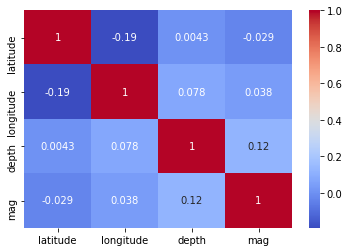

In \[144\]: s_df = spark.createDataFrame(pd_df)

9

In \[145\]: *\# Dataset after extraction of columns*

> new_df = s_df.select(\['year',
> 'decade_year','region','locationSource','magType','lat
>
> new_df.show(10)

+----+-----------+--------------+--------------+-------+--------+---------+------+---+

\|year\|decade_year\|
region\|locationSource\|magType\|latitude\|longitude\| depth\|mag\|

+----+-----------+--------------+--------------+-------+--------+---------+------+---+

\|2023\| 2020\|Central Turkey\| us\| mwr\| 37.9073\| 36.7306\|
10.0\|3.9\|

\|2023\| 2020\| Cyprus\| us\| ml\| 34.699\| 32.9989\| 6.139\|3.6\|

\|2022\| 2020\| Greece\| us\| mb\| 35.051\| 25.2338\|12.618\|3.7\|

\|2022\| 2020\| Croatia\| us\| mb\| 45.4685\| 16.219\| 9.826\|3.7\|

\|2022\| 2020\| Italy\| us\| ml\| 43.672\| 11.2558\| 7.93\|3.5\|

\|2022\| 2020\| Italy\| us\| ml\| 43.6656\| 11.284\| 7.42\|3.5\|

\|2022\| 2020\| Israel\| us\| ml\| 32.6567\| 35.4637\| 10.0\|3.7\|

\|2021\| 2020\| Serbia\| us\| mb\| 43.9764\| 20.8848\| 10.0\|3.9\|

\|2021\| 2020\| Greece\| us\| mb\| 38.9222\| 26.0911\| 14.73\|3.9\|

\|2021\| 2020\| Turkey\| us\| ml\| 40.9881\| 29.1424\| 9.81\|3.5\|

+----+-----------+--------------+--------------+-------+--------+---------+------+---+

only showing top 10 rows

In \[146\]: *\# Checking the datatype and possibility for null or nan
value*

> new_df.printSchema()

root

> \|-- year: long (nullable = true)
>
> \|-- decade_year: long (nullable = true)
>
> \|-- region: string (nullable = true)
>
> \|-- locationSource: string (nullable = true)
>
> \|-- magType: string (nullable = true)
>
> \|-- latitude: double (nullable = true)
>
> \|-- longitude: double (nullable = true)
>
> \|-- depth: double (nullable = true)
>
> \|-- mag: double (nullable = true)

In \[147\]: *\# Check for null values*

> null_counts = \[(column,
> new_df.where(new_df\[column\].isNull()).count()) **for** column **in**
>
> print(null_counts)

\[('year', 0), ('decade_year', 0), ('region', 0), ('locationSource', 0),
('magType', 0), ('lati

In \[148\]: *\# Get the number of rows and columns*

> num_rows = new_df.count()
>
> num_cols = len(new_df.columns)

10

> *\# Print the dimensions*
>
> print("Number of rows: ", num_rows)
>
> print("Number of columns: ", num_cols)

Number of rows: 30293

Number of columns: 9

> **Scaling the Dataset using Standarization method**

In \[152\]: **from pyspark.ml.feature import** StandardScaler

> **from pyspark.sql.functions import** log
>
> *\# Define the input columns to the scaler*
>
> input_cols = \['latitude', 'longitude', 'decade_year','depth','mag'\]
>
> *\# Assemble the input columns into a single vector column*
>
> assembler = VectorAssembler(inputCols=input_cols,
> outputCol='features')
>
> new_df1 = assembler.transform(new_df)
>
> *\# Standardize the data*
>
> standardScaler = StandardScaler(inputCol="features",
> outputCol="scaled_features")
>
> scaled_data = standardScaler.fit(new_df1).transform(new_df1)
>
> *\# Preview of the scaled_feature*
>
> scaled_data.show(10)
>
> scaled_data.select("scaled_features").show(1, truncate=**False**)

+----+-----------+--------------+--------------+-------+--------+---------+------+---+--------

\|year\|decade_year\|
region\|locationSource\|magType\|latitude\|longitude\| depth\|mag\|

+----+-----------+--------------+--------------+-------+--------+---------+------+---+--------

\|2023\| 2020\|Central Turkey\| us\| mwr\| 37.9073\| 36.7306\|
10.0\|3.9\|1.360976

\|2023\| 2020\| Cyprus\| us\| ml\| 34.699\| 32.9989\|
6.139\|3.6\|1.280933

\|2022\| 2020\| Greece\| us\| mb\| 35.051\| 25.2338\|12.618\|3.7\|
1.30833

\|2022\| 2020\| Croatia\| us\| mb\| 45.4685\| 16.219\| 9.826\|3.7\|
1.30833

\|2022\| 2020\| Italy\| us\| ml\| 43.672\| 11.2558\| 7.93\|3.5\| 1.25276

\|2022\| 2020\| Italy\| us\| ml\| 43.6656\| 11.284\| 7.42\|3.5\| 1.25276

\|2022\| 2020\| Israel\| us\| ml\| 32.6567\| 35.4637\| 10.0\|3.7\|
1.30833

\|2021\| 2020\| Serbia\| us\| mb\| 43.9764\| 20.8848\|
10.0\|3.9\|1.360976

\|2021\| 2020\| Greece\| us\| mb\| 38.9222\| 26.0911\|
14.73\|3.9\|1.360976

\|2021\| 2020\| Turkey\| us\| ml\| 40.9881\| 29.1424\| 9.81\|3.5\|
1.25276

+----+-----------+--------------+--------------+-------+--------+---------+------+---+--------

only showing top 10 rows

+---------------------------------------------------------------------------------------------

\|scaled_features

+---------------------------------------------------------------------------------------------

\|\[13.05127609493899,4.479276476379836,164.28722233459348,0.27505140956220075,8.513784632227685

11

+---------------------------------------------------------------------------------------------only
showing top 1 row

> **Using Elbow and Silhouette method for finding optimal cluster**

In \[153\]: **from pyspark.ml.clustering import** KMeans  
**from pyspark.ml.evaluation import** ClusteringEvaluator **import numpy
as np**  
**import matplotlib.pyplot as plt**

> *\# Define the range of k values to test*  
> k_values = range(2, 11)
>
> *\# Initialize lists to store SSE values and silhouette scores*
> sse_values = \[\]  
> silhouette_scores = \[\]
>
> *\# Loop over each k value and fit the k-means model*  
> **for** k **in** k_values:  
> kmeans = KMeans(k=k, seed=1).setFeaturesCol("scaled_features") model =
> kmeans.fit(scaled_data)
>
> *\# Make predictions and calculate SSE*  
> predictions = model.transform(scaled_data)  
> sse = model.computeCost(scaled_data)
>
> *\# Calculate silhouette score*  
> evaluator = ClusteringEvaluator()  
> silhouette_score = evaluator.evaluate(predictions)
>
> *\# Append SSE and silhouette score to lists*  
> sse_values.append(sse)  
> silhouette_scores.append(silhouette_score)
>
> *\# Plot the SSE values as a function of k*  
> plt.plot(k_values, sse_values, '-o')  
> plt.xlabel('Number of clusters (k)')  
> plt.ylabel('SSE')  
> plt.title('Elbow plot')  
> plt.show()
>
> *\# Plot the silhouette scores as a function of k*  
> plt.plot(k_values, silhouette_scores, '-o')  
> plt.xlabel('Number of clusters (k)')  
> plt.ylabel('Silhouette score')

12

> plt.title('Silhouette plot')  
> plt.show()

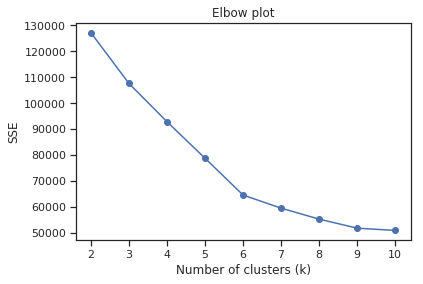

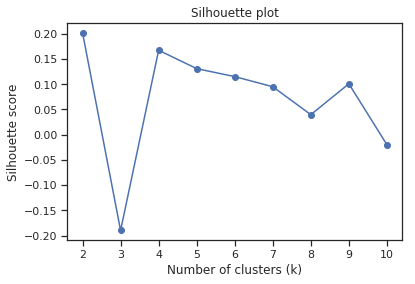

13

> **Clustering Using K means with 4 cluster. You can also change the
> cluster i.e., k value to see**

**the change in analysis**

In \[154\]: **from pyspark.ml.clustering import** KMeans

> *\# Set the number of clusters : Here elbow method suggest 4 clusters
> where slihouette*
>
> k = 4
>
> *\# Create the KMeans object and fit to the data*
>
> kmeans = KMeans(k=k, seed=1).setFeaturesCol("scaled_features")
>
> model = kmeans.fit(scaled_data)
>
> *\# Make predictions and evaluate the model*
>
> predictions = model.transform(scaled_data)
>
> *\# Extract the predicted cluster values from predictions*
>
> predicted_clusters = predictions.select('prediction')
>
> predicted_clusters.show(10)

+----------+

\|prediction\|

+----------+

\| 3\|

\| 3\|

\| 3\|

\| 1\|

\| 1\|

\| 1\|

\| 3\|

\| 3\|

\| 3\|

\| 0\|

+----------+

only showing top 10 rows

In \[155\]: new_df.show(10)

+----+-----------+--------------+--------------+-------+--------+---------+------+---+--------

\|year\|decade_year\|
region\|locationSource\|magType\|latitude\|longitude\| depth\|mag\|

+----+-----------+--------------+--------------+-------+--------+---------+------+---+--------

\|2023\| 2020\|Central Turkey\| us\| mwr\| 37.9073\| 36.7306\|
10.0\|3.9\|1.360976

\|2023\| 2020\| Cyprus\| us\| ml\| 34.699\| 32.9989\|
6.139\|3.6\|1.280933

\|2022\| 2020\| Greece\| us\| mb\| 35.051\| 25.2338\|12.618\|3.7\|
1.30833

\|2022\| 2020\| Croatia\| us\| mb\| 45.4685\| 16.219\| 9.826\|3.7\|
1.30833

\|2022\| 2020\| Italy\| us\| ml\| 43.672\| 11.2558\| 7.93\|3.5\| 1.25276

14

\|2022\| 2020\| Italy\| us\| ml\| 43.6656\| 11.284\| 7.42\|3.5\| 1.25276

\|2022\| 2020\| Israel\| us\| ml\| 32.6567\| 35.4637\| 10.0\|3.7\|
1.30833

\|2021\| 2020\| Serbia\| us\| mb\| 43.9764\| 20.8848\|
10.0\|3.9\|1.360976

\|2021\| 2020\| Greece\| us\| mb\| 38.9222\| 26.0911\|
14.73\|3.9\|1.360976

\|2021\| 2020\| Turkey\| us\| ml\| 40.9881\| 29.1424\| 9.81\|3.5\|
1.25276

+----+-----------+--------------+--------------+-------+--------+---------+------+---+--------

only showing top 10 rows

In \[191\]: **import numpy as np**

> *\# Creating a Pandas dataframe for analysing clusters*
>
> data = np.array(new_df.select('decade_year','latitude',
> 'longitude','mag','depth').c
>
> clusters =
> np.array(predictions.select("prediction").collect()).reshape(-1,1)
>
> data1 = np.hstack((data, clusters))
>
> df1 = pd.DataFrame(data = data1, columns=('decade_year','latitude',
> 'longitude', 'ma
>
> df1.head(10)

<table>
<colgroup>
<col style="width: 12%" />
<col style="width: 12%" />
<col style="width: 12%" />
<col style="width: 12%" />
<col style="width: 12%" />
<col style="width: 12%" />
<col style="width: 12%" />
<col style="width: 12%" />
</colgroup>
<thead>
<tr class="header">
<th rowspan="11">Out[191]:</th>
<th rowspan="2">0</th>
<th>decade_year</th>
<th>latitude</th>
<th>longitude</th>
<th>mag</th>
<th>depth</th>
<th><blockquote>
<p>clusters</p>
</blockquote></th>
</tr>
<tr class="odd">
<th>2020.0</th>
<th><blockquote>
<p>37.9073</p>
</blockquote></th>
<th>36.7306</th>
<th>3.9</th>
<th>10.000</th>
<th>3.0</th>
</tr>
<tr class="header">
<th>1</th>
<th>2020.0</th>
<th><blockquote>
<p>34.6990</p>
</blockquote></th>
<th>32.9989</th>
<th>3.6</th>
<th>6.139</th>
<th>3.0</th>
</tr>
<tr class="odd">
<th>2</th>
<th>2020.0</th>
<th><blockquote>
<p>35.0510</p>
</blockquote></th>
<th>25.2338</th>
<th>3.7</th>
<th>12.618</th>
<th>3.0</th>
</tr>
<tr class="header">
<th>3</th>
<th>2020.0</th>
<th><blockquote>
<p>45.4685</p>
</blockquote></th>
<th>16.2190</th>
<th>3.7</th>
<th>9.826</th>
<th>1.0</th>
</tr>
<tr class="odd">
<th>4</th>
<th>2020.0</th>
<th><blockquote>
<p>43.6720</p>
</blockquote></th>
<th>11.2558</th>
<th>3.5</th>
<th>7.930</th>
<th>1.0</th>
</tr>
<tr class="header">
<th>5</th>
<th>2020.0</th>
<th><blockquote>
<p>43.6656</p>
</blockquote></th>
<th>11.2840</th>
<th>3.5</th>
<th>7.420</th>
<th>1.0</th>
</tr>
<tr class="odd">
<th>6</th>
<th>2020.0</th>
<th><blockquote>
<p>32.6567</p>
</blockquote></th>
<th>35.4637</th>
<th>3.7</th>
<th>10.000</th>
<th>3.0</th>
</tr>
<tr class="header">
<th>7</th>
<th>2020.0</th>
<th><blockquote>
<p>43.9764</p>
</blockquote></th>
<th>20.8848</th>
<th>3.9</th>
<th>10.000</th>
<th>3.0</th>
</tr>
<tr class="odd">
<th>8</th>
<th>2020.0</th>
<th><blockquote>
<p>38.9222</p>
</blockquote></th>
<th>26.0911</th>
<th>3.9</th>
<th>14.730</th>
<th>3.0</th>
</tr>
<tr class="header">
<th>9</th>
<th>2020.0</th>
<th><blockquote>
<p>40.9881</p>
</blockquote></th>
<th>29.1424</th>
<th>3.5</th>
<th>9.810</th>
<th>0.0</th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> **Cluster analysis**

In \[179\]: *\# Descriptive of clusters*

> summary_mean = df1.groupby('clusters').mean()
>
> print(summary_mean)

<table style="width:100%;">
<colgroup>
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
</colgroup>
<thead>
<tr class="header">
<th>clusters</th>
<th>year</th>
<th><blockquote>
<p>latitude</p>
</blockquote></th>
<th>longitude</th>
<th>mag</th>
<th><blockquote>
<p>depth</p>
</blockquote></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td>0.0</td>
<td>1996.793299</td>
<td>37.722833</td>
<td>24.450266</td>
<td>3.768903</td>
<td><blockquote>
<p>17.497919</p>
</blockquote></td>
</tr>
<tr class="even">
<td>1.0</td>
<td>1997.519381</td>
<td>40.753160</td>
<td><blockquote>
<p>8.267179</p>
</blockquote></td>
<td>3.943706</td>
<td><blockquote>
<p>10.924427</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>2.0</td>
<td>1987.466782</td>
<td>38.704592</td>
<td>23.393156</td>
<td>4.445039</td>
<td><blockquote>
<p>80.260745</p>
</blockquote></td>
</tr>
<tr class="even">
<td>3.0</td>
<td>2013.217297</td>
<td>37.376092</td>
<td>24.377763</td>
<td>4.473754</td>
<td><blockquote>
<p>17.140235</p>
</blockquote></td>
</tr>
</tbody>
</table>

In \[180\]: summary_sd = df1.groupby('clusters').std()

> print(summary_sd)

15

<table style="width:100%;">
<colgroup>
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
</colgroup>
<thead>
<tr class="header">
<th>clusters</th>
<th>year</th>
<th>latitude</th>
<th>longitude</th>
<th>mag</th>
<th><blockquote>
<p>depth</p>
</blockquote></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td>0.0</td>
<td><blockquote>
<p>8.856128</p>
</blockquote></td>
<td>2.020070</td>
<td><blockquote>
<p>3.802415</p>
</blockquote></td>
<td>0.240784</td>
<td><blockquote>
<p>13.489890</p>
</blockquote></td>
</tr>
<tr class="even">
<td>1.0</td>
<td>10.704326</td>
<td>3.686642</td>
<td><blockquote>
<p>8.152568</p>
</blockquote></td>
<td>0.380088</td>
<td><blockquote>
<p>9.324065</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>2.0</td>
<td>11.320844</td>
<td>3.309735</td>
<td><blockquote>
<p>4.864333</p>
</blockquote></td>
<td>0.482056</td>
<td><blockquote>
<p>80.413636</p>
</blockquote></td>
</tr>
<tr class="even">
<td>3.0</td>
<td><blockquote>
<p>7.703772</p>
</blockquote></td>
<td>2.397469</td>
<td><blockquote>
<p>5.525668</p>
</blockquote></td>
<td>0.408550</td>
<td><blockquote>
<p>15.433507</p>
</blockquote></td>
</tr>
</tbody>
</table>

In \[181\]: summary_min = df1.groupby('clusters').min()
print(summary_min)

<table style="width:100%;">
<colgroup>
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
</colgroup>
<thead>
<tr class="header">
<th>clusters</th>
<th>year</th>
<th>latitude</th>
<th>longitude</th>
<th>mag</th>
<th><blockquote>
<p>depth</p>
</blockquote></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td>0.0</td>
<td>1973.0</td>
<td>30.088</td>
<td>9.280</td>
<td>3.5</td>
<td><blockquote>
<p>0.0</p>
</blockquote></td>
</tr>
<tr class="even">
<td>1.0</td>
<td>1973.0</td>
<td>31.678</td>
<td>-5.727</td>
<td>3.5</td>
<td><blockquote>
<p>0.0</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>2.0</td>
<td>1973.0</td>
<td>30.480</td>
<td>-4.634</td>
<td>3.5</td>
<td><blockquote>
<p>2.0</p>
</blockquote></td>
</tr>
<tr class="even">
<td>3.0</td>
<td>1988.0</td>
<td>30.079</td>
<td>-4.372</td>
<td>3.6</td>
<td><blockquote>
<p>0.0</p>
</blockquote></td>
</tr>
</tbody>
</table>

In \[182\]: summary_max = df1.groupby('clusters').max()
print(summary_max)

<table style="width:100%;">
<colgroup>
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
</colgroup>
<thead>
<tr class="header">
<th>clusters</th>
<th>year</th>
<th>latitude</th>
<th>longitude</th>
<th>mag</th>
<th><blockquote>
<p>depth</p>
</blockquote></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td>0.0</td>
<td>2021.0</td>
<td><blockquote>
<p>46.0000</p>
</blockquote></td>
<td>36.7160</td>
<td>4.7</td>
<td><blockquote>
<p>107.00</p>
</blockquote></td>
</tr>
<tr class="even">
<td>1.0</td>
<td>2023.0</td>
<td><blockquote>
<p>46.0120</p>
</blockquote></td>
<td>25.2730</td>
<td>6.0</td>
<td><blockquote>
<p>116.50</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>2.0</td>
<td>2023.0</td>
<td><blockquote>
<p>45.9820</p>
</blockquote></td>
<td>36.4660</td>
<td>7.5</td>
<td><blockquote>
<p>626.20</p>
</blockquote></td>
</tr>
<tr class="even">
<td>3.0</td>
<td>2023.0</td>
<td><blockquote>
<p>45.9104</p>
</blockquote></td>
<td>36.7306</td>
<td>7.6</td>
<td><blockquote>
<p>141.14</p>
</blockquote></td>
</tr>
</tbody>
</table>

In \[183\]: sns.catplot(data = df1, x='clusters', kind='count',
height=6, aspect=2) plt.show()

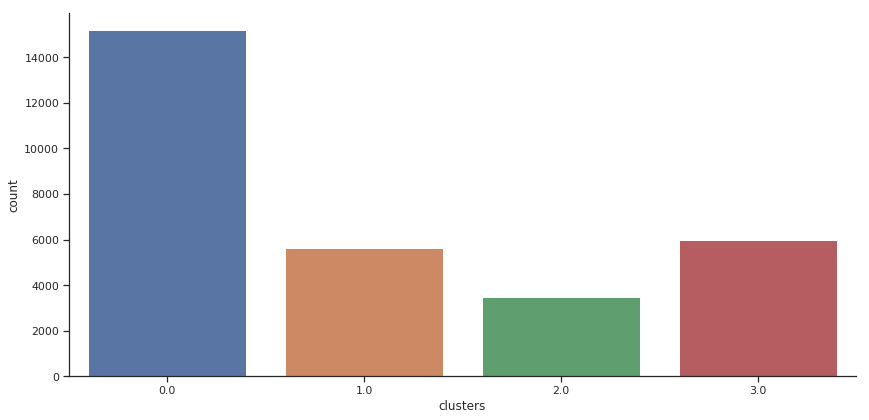

16

In \[184\]: sns.FacetGrid(df1,hue="clusters", height=6, aspect =
2).map(plt.scatter, 'longitude'

Out\[184\]: \<seaborn.axisgrid.FacetGrid at 0x7fa897716390\>

> <img
> src="attachment:vertopal_10176f0ba0914f1e80a42fafb3360c42/media/image10.png"
> style="width:5.85in;height:2.69167in" />

In \[192\]: **from sklearn.decomposition import** PCA  
*\# create PCA plot*  
pca = PCA(n_components=2).fit_transform(df1\[\['latitude', 'longitude',
'decade_year',

> *\# Convert the Spark DataFrame to a Pandas DataFrame* pandas_df =
> predictions.toPandas()
>
> *\# Extract the predicted cluster values as a NumPy array*
> predicted_clusters = pandas_df\['prediction'\].to_numpy()
>
> plt.figure(figsize=(8,6))  
> plt.scatter(pca\[:,1\], pca\[:,0\], c = predicted_clusters)
> plt.xlabel('PCA 1')  
> plt.ylabel('PCA 2')  
> plt.show()

17

> <img
> src="attachment:vertopal_10176f0ba0914f1e80a42fafb3360c42/media/image11.png"
> style="width:5.85in;height:4.35972in" />

In \[193\]: sns.set(style="ticks")  
sns.pairplot(df1, vars=\['decade_year','latitude', 'longitude',
'mag','depth'\], hue=' plt.show()

18

> <img
> src="attachment:vertopal_10176f0ba0914f1e80a42fafb3360c42/media/image12.png"
> style="width:5.85in;height:5.41667in" />

In \[ \]: *\# group the dataframe by cluster and depth and count the
number of occurrences* cluster_mag_counts = df1.groupby(\['clusters',
'mag'\]).size().reset_index(name='counts'

> *\# loop through each cluster and create a bar graph*  
> **for** cluster **in** cluster_mag_counts\['clusters'\].unique():  
> *\# get the data for the current cluster*  
> cluster_data = cluster_mag_counts\[cluster_mag_counts\['clusters'\] ==
> cluster\] *\# create the bar graph*  
> plt.figure(figsize=(10,6))  
> plt.bar(cluster_data\['mag'\], cluster_data\['counts'\],
> color='blue')  
> plt.title(f'Cluster **{cluster}** Magnitude Counts')  
> plt.xlabel('Magnitude')  
> plt.ylabel('Counts')  
> plt.show()

In \[ \]:

19

In \[ \]:

20
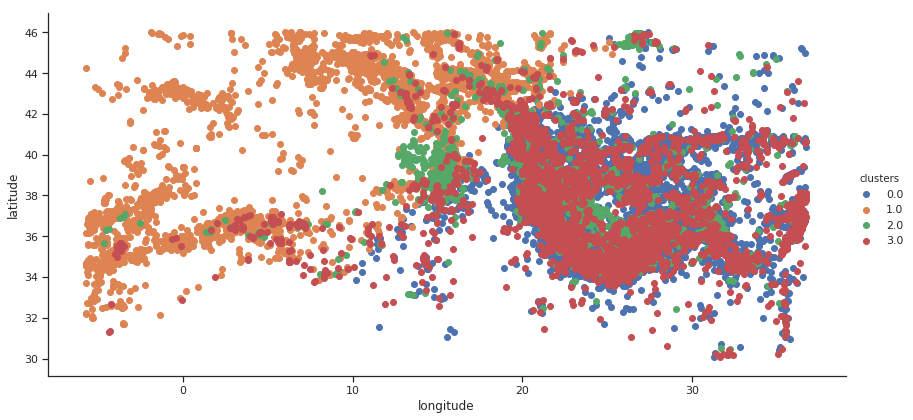
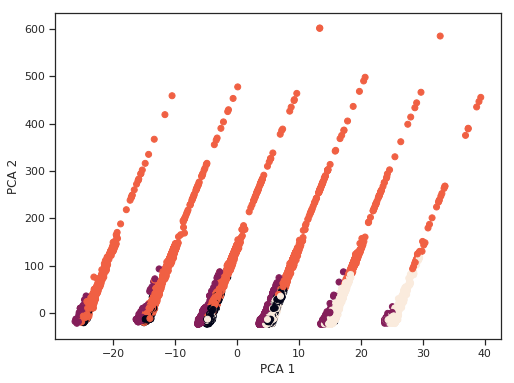
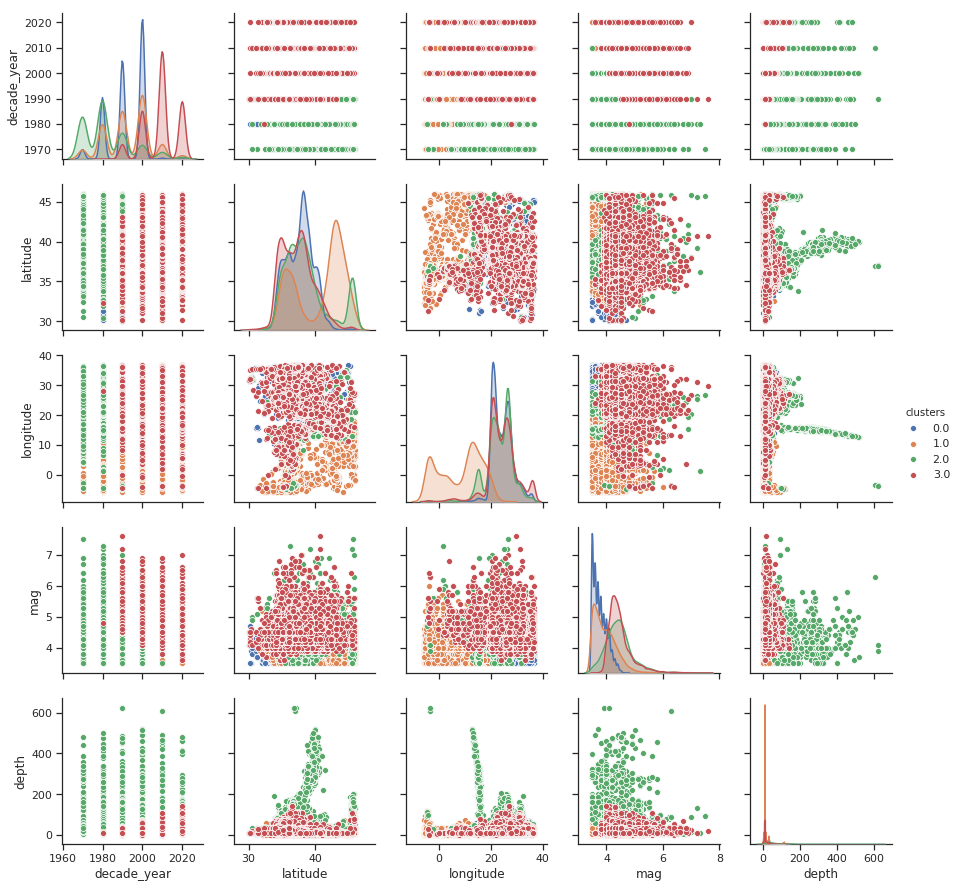